# Introductory applied machine learning (INFR10069)

# Assignment 3: Object recognition

## Marking Breakdown

**70-100%** results/answer correct plus extra achievement at understanding or analysis of results. Clear explanations, evidence of creative or deeper thought will contribute to a higher grade.

**60-69%** results/answer correct or nearly correct and well explained.

**50-59%** results/answer in right direction but significant errors.

**40-49%** some evidence that the student has gained some understanding, but not answered the questions
properly.

**0-39%** serious error or slack work.

## Mechanics

Fill out this notebook, save it, and submit it **and a `.txt` file** (see Part 2) in answer to this assignment.
**You need to submit these two files electronically as described below.**

On a DICE environment, open the terminal, navigate to the location of this notebook, and submit this notebook file using the following command:

`submit iaml cw2 07_Assignment_3.ipynb assignment_3_predictions.txt`

What actually happens in the background is that your file is placed in a folder available to markers. If you submit a file with the same name into the same location, **it will *overwrite* your previous submission**. You can check the status of your submissions with the `show_submissions` command.

**Distance Learners:** To copy your work up to DICE (such that you can use the `submit` command) you can use `scp` or `rsync` (you may need to install these yourself). You can copy files up using `student.ssh.inf.ed.ac.uk`, then ssh in to submit, e.g. (in a unix terminal):
```
filename1=07_Assignment_3.ipynb
local_scp_filepath1=~/git/iaml2017/${filename1}
filename2=assignment_3_predictions.txt
local_scp_filepath2=~/git/iaml2017/${filename2}
UUN=s0816700
server_address=student.ssh.inf.ed.ac.uk
scp -r ${local_scp_filepath1} ${UUN}@${server_address}:${filename1}
scp -r ${local_scp_filepath2} ${UUN}@${server_address}:${filename2}
# rsync -rl ${local_scp_filepath1} ${UUN}@${server_address}:${filename1}
# rsync -rl ${local_scp_filepath2} ${UUN}@${server_address}:${filename2}
ssh ${UUN}@${server_address}
ssh student.login
submit iaml cw2 07_Assignment_3.ipynb assignment_3_predictions.txt
```

**Late submissions:** The policy stated in the School of Informatics MSc Degree Guide is that normally you will not be allowed to submit coursework late. See http://www.inf.ed.ac.uk/teaching/years/msc/courseguide10.html#exam for exceptions to this, e.g. in case of serious medical illness or serious personal problems.

**Collaboration:** You may discuss the assignment with your colleagues, provided that the writing that you submit is entirely your own. That is, you should NOT borrow actual text or code from other students. We ask that you provide a list of the people who you've had discussions with (if any).

**Resubmission:** If you submit your file again, the previous submission is **overwritten**. We will mark the version that is in the submission folder at the deadline.

## Important Instructions

1. You *MUST* have your environment set up as in the [README](https://github.com/JamesOwers/iaml2017) and you *must activate this environment before running this notebook*:
```
source activate iaml
cd iaml_2017
jupyter notebook
# Navigate to this file
```

1. Wherever you are required to produce code you should use code cells, otherwise you should use markdown cells to report results and explain answers.

1. The .csv files that you will be using are located at `./datasets` (the `datasets` directory is adjacent to this file).

1. **IMPORTANT:** Keep your answers brief and concise. Most written questions can be answered with 2-3 lines of explanation.

## Imports

Include all required imports and execute the cell below. It's typical to include package imports at the top of the file for clarity.

In [113]:
from __future__ import print_function, division
%matplotlib inline
import pandas as pd
import seaborn as sns
sns.set(style="darkgrid")
import matplotlib.pyplot as plt
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import classification_report, roc_curve, auc
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from numpy import unravel_index
# Your code goes here

## Description of the dataset
In this assignment our goal is to recognize objects in images of realistic scenes. There are 19 different classes of object e.g. person, dog, cat, car, etc. The dataset derives from several thousands photographs harvested from the web. Each object of a relevant class has been manually annotated with a bounding box. Images can contain none, one or multiple objects of each class. We have prepared a [website](http://www.inf.ed.ac.uk/teaching/courses/iaml/2014/assts/asst3/images.html) where you can view the images.

We are going to detect whether images contain a person or not - a binary classification problem. To save you time and to make the problem manageable with limited computational resources, we have preprocessed the dataset. We will use the [Bag of Visual Words](https://en.wikipedia.org/wiki/Bag-of-words_model_in_computer_vision) representation. Each column of the dataset (which is not an lable), refers to a 'visual word'. Each image is represented by a 500 dimensional vector that contains the normalized count for each of 500 different visual words present in the respective image (a similar representation is used for the spambase dataset, just for real words). See the Appendix at the bottom of the notebook for more information. The image data is thus a $N \times 500$ dimensional matrix where `N` is the number of images.

The full dataset has 520 attributes (dimensions). The first attribute (`imgID`) contains the image ID which allows you to associate a data point with an actual image. The next 500 attributes (`dim1`, ..., `dim500`) are a normalized count vector for each visual word. The last 19 attributes (`is_class`) are the labels - 1 means the class is present in the image. In most of the experiments (unless explicitly noted otherwise) you will only need the `is_person` attribute and the 500 dimensional feature vector. **Do not use the additional class indicator attributes as features** unless explicitly told to do so. 

In Part A we provide you with a training (`train_images partA.csv`) and a validation (`valid_images partA .csv`) dataset. In Part B we provide three data sets: a training set (`train_images partB.csv`), a validation set (`valid_images partB.csv`), and a test set (`test_images partB.csv`). The training and validation set contain valid labels. In the test set the labels are missing. The files are available from the GitHub repository. 

**Important**: *Throughout the assignment you will be given various versions of the dataset that are relevant
to a particular question. Please be careful to use the correct version of the dataset when instructed to do so.
If you use the wrong version of the dataset by mistake no marks will be awarded.*

## 1. Exploration of the dataset [70%]

### ========== Question 1.1 --- [1 mark] ==========
Create two Pandas DataFrame objects called `train_A` and `valid_A` by loading the datasets `train_images_partA.csv` and `valid_images_partA.csv`. Display the number of data points and attributes in each of the two datasets.

In [2]:
# Your code goes here
trainA = pd.read_csv('datasets/train_images_partA.csv')
validA = pd.read_csv('datasets/valid_images_partA.csv')
print('Number of training instances ', trainA.shape[0])
print('Number of training attributes ', trainA.shape[1])
print('Number of validation instances ', validA.shape[0])
print('Number of validation attributes ', validA.shape[1])

Number of training instances  2093
Number of training attributes  520
Number of validation instances  1113
Number of validation attributes  520


### ========== Question 1.2 --- [1 mark] ==========
Display and inspect the first 10 instances in the training dataset.

In [3]:
# Your code goes here
trainA.head(10)

,imgId,dim1,dim2,dim3,dim4,dim5,dim6,dim7,dim8,dim9,...,is_cow,is_diningtable,is_dog,is_horse,is_motorbike,is_person,is_pottedplant,is_sheep,is_sofa,is_tvmonitor
0,2008_000008,0.002232,0.000558,0.002790,0.000837,0.001674,0.001953,0.001395,0.002232,0.003627,...,0,0,0,1,0,1,0,0,0,0
1,2008_000015,0.001563,0.000391,0.007422,0.003516,0.003906,0.005078,0.001953,0.002344,0.001953,...,0,0,0,0,0,0,0,0,0,0
2,2008_000019,0.000521,0.000000,0.000000,0.001042,0.001563,0.005729,0.000521,0.002083,0.003646,...,0,0,1,0,0,0,0,0,0,0
3,2008_000023,0.002976,0.002232,0.004464,0.000372,0.000372,0.002232,0.000000,0.003720,0.000000,...,0,0,0,0,0,1,0,0,0,1
4,2008_000028,0.001359,0.000340,0.001359,0.000340,0.001359,0.002038,0.002378,0.000000,0.003397,...,0,0,0,0,0,0,0,0,0,0
5,2008_000033,0.000000,0.006324,0.000372,0.000372,0.000372,0.000372,0.000744,0.008185,0.000372,...,0,0,0,0,0,0,0,0,0,0
6,2008_000036,0.000340,0.000000,0.004416,0.000340,0.000679,0.006114,0.001359,0.002717,0.003057,...,0,0,0,0,0,1,0,0,0,0
7,2008_000037,0.000837,0.002232,0.000279,0.000279,0.000837,0.000000,0.000279,0.006696,0.000000,...,0,0,0,0,0,0,0,0,0,0
8,2008_000041,0.002378,0.001359,0.004755,0.001019,0.003736,0.001359,0.001019,0.004076,0.003397,...,0,1,0,0,0,1,0,0,0,0
9,2008_000045,0.001019,0.000340,0.006454,0.001698,0.001359,0.003736,0.000000,0.004076,0.000000,...,0,0,0,0,0,0,0,0,0,0


### ========== Question 1.3 --- [1 mark] ==========
Select the attributes (i.e. input features) for training our classifiers. These should be the visual word normalised counts `dim1, dim2, ..., dim500`. Create a list of the **names** of the attributes of interest. 

In [4]:
# Your code goes here
attributes = trainA.columns[1:501].values

### ========== Question 1.4 --- [1 mark] ==========
By using the list from Question 1.3 now create 4 numpy arrays `X_tr`, `X_val`, `y_tr` and `y_val` in which to store the training features, validation features, training targets, and validation targets, respectively. Your target vectors should correspond to the `is_person` attribute of the training and validation sets. Display the dimensionalities (i.e shapes) of the 4 arrays. 

Check this carefully - you will be penalised in following questions if the data is not correct!

In [5]:
# Your code goes here
target = 'is_person'
X_tr = trainA[attributes]
X_val = validA[attributes]
y_tr = trainA[target]
y_val = validA[target]

### ========== Question 1.5 --- [2 marks] ==========
Create a [countplots](https://seaborn.github.io/generated/seaborn.countplot.html?highlight=countplot#seaborn.countplot) for the training and validation targets. Create a single figure, and put the two plots inside the single figure. Label axes appropriately and add a title to your plot. Use descriptive `xticklabels` instead of the default numeric ones.

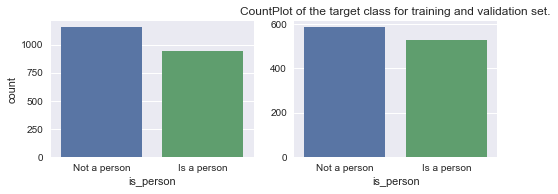

In [6]:
# Your code goes here
fig = plt.figure()

ax1 = fig.add_subplot(221)
ax1 = sns.countplot(x=target,data = trainA)
ax2 = fig.add_subplot(222)
ax2 = sns.countplot(x=target,data = validA)
ax2.set_ylabel("")
ax1.set_xticklabels(['Not a person', 'Is a person'])
ax2.set_xticklabels(['Not a person', 'Is a person'])

plt.title("CountPlot of the target class for training and validation set.")

### ========== Question 1.6 --- [1 mark] ==========
We want to make a baseline classification accuracy to beat. Pick a baseline "dummy" classifier, describe in a sentence why you chose it, and report the accuracy it achieves on the validation set?

*Your answer goes here*
I would go with a dummy classifier that just predicts the most frequent label in the training target value, which is 0 (Not a person) in 'is_person attribute'. Random classifier might give us a good accuracy once in a while and as it is not reliable I am down with a classifier that always predicts 0 as the output.

In [7]:
# Your code goes here
dummy_model = DummyClassifier(strategy='most_frequent',random_state=0)
dummy_model.fit(X_tr, y_tr)
print('Score of the baseline model (dummy classifier): ',dummy_model.score(X_val, y_val))

Score of the baseline model (dummy classifier):  0.526504941599


### ========== Question 1.7 --- [3 marks] ==========
Train a [`LogisticRegression`](http://scikit-learn.org/0.17/modules/generated/sklearn.linear_model.LogisticRegression.html) classifier using default settings, except for the `solver` parameter which you should set to `lbfgs`. Report the classification accuracy score on the training and validation sets and compare with the baseline. Comment on the results with 1-2 sentences. You may include any additional plot(s) if you wish to justify your explanation.

Logistic regression score on validation set 0.526504941599
Logistic regression score on training set 0.55088389871
             precision    recall  f1-score   support

          0       0.53      1.00      0.69       586
          1       0.00      0.00      0.00       527

avg / total       0.28      0.53      0.36      1113



/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


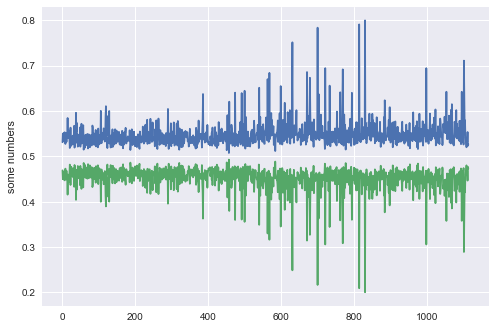

In [8]:
# Your code goes here
log_regress = LogisticRegression(solver = "lbfgs")
log_regress.fit(X_tr,y_tr)
y_pred_log = log_regress.predict(X_val)
print("Logistic regression score on validation set",log_regress.score(X_val, y_val))
print("Logistic regression score on training set",log_regress.score(X_tr,y_tr))
print(classification_report(y_val, y_pred_log, target_names=["0","1"]))
probability = log_regress.predict_proba(X_val)
plt.plot(probability)
plt.ylabel('some numbers')
plt.show()


*Your answer goes here*
As you can see, the score of logistic regression is as same as the dummy classifier. Dummy classifier just assigned the label with the higher prior value (which is 0, not a person). Logistic regression tries to fit a linear curve and applies a non linear curve eventually. Still, the score is low and as exactly same as the dummy classifier. This leads to the thought that logistic regression outputs zeroes for all datapoints and as you can see in the plot above, the probability for every instance is below 0.5 for value 1 and above 0.5 for value 0. Hence, the result. Blue curve for value 0 and green curve for value 1.

### ========== Question 1.8 --- [1 mark] ==========
Display the means and standard deviations of the first 5 features in the training set. *Hint: you want to compute the means and standard deviations for each column in your arrays. Make sure you make appropriate use of the `axis` parameter.*

In [9]:
# Your code goes here
first_five_columns_mean = []
first_five_columns_std = []
first_five_columns = X_tr.iloc[0:5]
for i in range(5):
    first_five_columns_mean.append(X_tr.iloc[i].mean())
    first_five_columns_std.append(X_tr.iloc[i].std())
    print("Mean of", X_tr.columns.values[i],":")
    print(first_five_columns_mean[i])
    print("STD of", X_tr.columns.values[i],":")
    print(first_five_columns_std[i])

Mean of dim1 :
0.0019998839999999956
STD of dim1 :
0.001703522037782436
Mean of dim2 :
0.0020000579999999973
STD of dim2 :
0.0016943279130055009
Mean of dim3 :
0.0020000739999999962
STD of dim3 :
0.0022940422123116527
Mean of dim4 :
0.001999886000000001
STD of dim4 :
0.0018128189988106651
Mean of dim5 :
0.0019999739999999925
STD of dim5 :
0.002152774603694642


### ========== Question 1.9 --- [3 marks] ==========
Feature standardisation is a pre-processing technique used to transform data so that they have zero mean and unit standard deviation. For many algorithms, this is a very important step for training models (both regression and classification). Read about [feature standardisation](http://scikit-learn.org/0.17/modules/preprocessing.html) and make sure you understand what kind of transformation this method applies to the data.

`Scikit-learn` offers a [class](http://scikit-learn.org/0.17/modules/generated/sklearn.preprocessing.StandardScaler.html) for feature standardisation. Instansiate a StandardScaler object and fit it using the **training features**. Use this fitted object to transform both your training and validation features to have a standard scale. 

Once your training and validation input data have been transformed, display the means and standard deviations of the first 5 attributes for **both** the training and validation sets. Are the results as you expected? Explain your answer in 2-3 sentences. Why didn't we use the validation set to standardise the data?

**IMPORTANT: You should use the transformed data for the rest of this part.**

In [10]:

scaler = StandardScaler().fit(X_tr)
X_tr = scaler.transform(X_tr)
X_val = scaler.transform(X_val)

print("Training Set:")
for i in range(0,5):
    print("Mean of dim", [i])
    print("{:.7f}".format(X_tr[:,i].mean()))
    print("STD")
    print("{:.7f}".format(X_tr[:,i].std()))
print("-------------------------------------")
print("-------------------------------------")
print("-------------------------------------")
print("Validation Set:")
for i in range(0,5):
    print("Mean")
    print("{:.7f}".format(X_val[:,i].mean()))
    print("STD")
    print("{:.7f}".format(X_val[:,i].std()))

Training Set:
Mean of dim [0]
-0.0000000
STD
1.0000000
Mean of dim [1]
-0.0000000
STD
1.0000000
Mean of dim [2]
0.0000000
STD
1.0000000
Mean of dim [3]
0.0000000
STD
1.0000000
Mean of dim [4]
-0.0000000
STD
1.0000000
-------------------------------------
-------------------------------------
-------------------------------------
Validation Set:
Mean
-0.0055061
STD
1.0131089
Mean
-0.0382933
STD
0.9698195
Mean
0.1091510
STD
1.0492285
Mean
0.0936931
STD
1.0568448
Mean
0.0305784
STD
0.9747134


*Your answer goes here*
The transformed distribution is as expected. As we saw inn the last answer, the distribution is not tough to work on, so we are trying to convert it into a Gaussian distribution. Though we are not expecting an exact shape(when plotted), Guassian conversion procedures like subtracting with the mean and dividing by the standard deviation will give us a normally distributed data which will be sensible to work on. 

From the result, it is easy to observe that training set is transformed properly as it should be (mean = 0; std = 1). But validation set is not properly converted as the StandardScaler is built by fitting transformed data for training sets. 

As validation datasets are 'pretend-to-be' test datasets, it is not advised to pivot any transformation on validation or testing datasets. This will help us in increasing the generalization.

### ========== Question 1.10 --- [3 marks] ==========
By using the transformed input data, train a new `LogisticRegression` classifier. Again, set the `solver` parameter to `lbfgs` and use default settings for the other parameters. Report the classification accuracy on both the training and validation sets.

Comment on how your model compares to the baseline classifier from Question 1.6? You may use additional plot(s) to support your explanation.

In [11]:
# Your code goes here
log_regress_transformed = LogisticRegression(solver = "lbfgs")
log_regress_transformed.fit(X_tr, y_tr)
print("Score of logistic regression on trasformed validation data", log_regress_transformed.score(X_val, y_val))
print("Score of logistic regression on trasformed training data", log_regress_transformed.score(X_tr, y_tr))

Score of logistic regression on trasformed validation data 0.643306379155
Score of logistic regression on trasformed training data 0.810797897754


*Your answer goes here*
As you see, the Score of logistic regression on trasformed data have increased both in training and validation set. 
But it has tremendously increased in training set and slightly inncreased inn validation set. This is because as the data is scaled down by dividing it by its standard deviation. Having dsid that, the transformation is not properly fit into the validation set as we saw earlier. Even minor transformation change makes large difference, hence some data are ambiguous (as they are scaled down) to classify, hence the score. 

### ========== Question 1.11 --- [1 mark] ==========
So far we have used default settings for training the logistic regression classifier. Now, we want to use [K-fold cross-validation](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html) to optimise the regularisation parameter `C`. The regularisation parameter controls the degree to which we wish to penalise large magnitudes in the weight vector. This can help us prevent overfitting but, if set too high, could lead us to underfit too.

Create a 3-fold cross-validation object. Set the `shuffle` parameter to `True` and the `random_state` to `0`. By using the cross-validation iterator, display the number of test samples for each fold.

In [12]:
# Your code goes here
kf_splits = KFold(n_splits =3, random_state = 0, shuffle = True)
for train_index, test_index in kf_splits.split(X_tr):
    print("Number of training index for fold",len(train_index))
    print("Number of training index for fold",len(test_index))
    print("-------------------------------------")

Number of training index for fold 1395
Number of training index for fold 698
-------------------------------------
Number of training index for fold 1395
Number of training index for fold 698
-------------------------------------
Number of training index for fold 1396
Number of training index for fold 697
-------------------------------------


### ========== Question 1.12 --- [2 marks] ========== 
Using the cross-validation iterator from the previous question, perform a search for the best value for `C`. 

We are going to loop over each CV fold, and each value of `C`. The values of `C` to search should be 20 equally-spaced values **in log space** ranging from `1e-5` to `1e5` *(hint: look at the `logspace()` function in numpy)*. 

Create a 2-dimensional array and, for each cross-validation fold and parameter setting pair, compute and store the classification accuracy score e.g. store the score of fold 0 with parameter setting 1 at score_array[0,1]. As previously, set the `solver` parameter to `lbfgs` and use default settings for the other parameters (except for `C` obviously!).

*(hint: you could use two loops in your code; one iterating over CV folds and another one iterating over the values for `C`)*. 

In [36]:
# Your code goes here
c_values = np.logspace(-5, 5, num=20)
score_array = np.zeros((3,20))
fold = 0
for train_index, test_index in kf_splits.split(X_tr):
    X_train_temp, X_test_temp = X_tr[train_index, :], X_tr[test_index, :]
    y_train_temp, y_test_temp = y_tr.iloc[train_index], y_tr.iloc[test_index]
    c_in_C = 0
    for c in c_values:
        log_regress_in_loop = LogisticRegression(solver = "lbfgs", C = c)
        log_regress_in_loop.fit(X_train_temp,y_train_temp)
        score_array[fold][c_in_C] = log_regress_in_loop.score(X_test_temp,y_test_temp)
        c_in_C += 1
    fold += 1
print(score_array)

[[ 0.5730659   0.62893983  0.66762178  0.67191977  0.68767908  0.69627507
   0.6747851   0.67048711  0.65329513  0.65902579  0.65902579  0.65329513
   0.64899713  0.64613181  0.64613181  0.64899713  0.64613181  0.64613181
   0.64899713  0.64899713]
 [ 0.54584527  0.63180516  0.69484241  0.71919771  0.72922636  0.73495702
   0.70200573  0.6747851   0.65472779  0.63610315  0.63180516  0.63323782
   0.6260745   0.62750716  0.62750716  0.6260745   0.6260745   0.6260745
   0.62750716  0.6260745 ]
 [ 0.54806313  0.63558106  0.64275466  0.65566714  0.68005739  0.70014347
   0.68149211  0.67001435  0.66284075  0.64418938  0.63271162  0.62553802
   0.6241033   0.6241033   0.6241033   0.6241033   0.6241033   0.6241033
   0.6241033   0.6241033 ]]


### ========== Question 1.13 --- [1 mark] ========== 
Plot the mean classification performance (across CV folds) of the logistic regression classifier against the regularisation parameter `C` by using the range from Question 1.12. Use a logarithmic scale for the x-axis and label both axes appropriately. 

[[ 0.5730659   0.54584527  0.54806313]
 [ 0.62893983  0.63180516  0.63558106]
 [ 0.66762178  0.69484241  0.64275466]
 [ 0.67191977  0.71919771  0.65566714]
 [ 0.68767908  0.72922636  0.68005739]
 [ 0.69627507  0.73495702  0.70014347]
 [ 0.6747851   0.70200573  0.68149211]
 [ 0.67048711  0.6747851   0.67001435]
 [ 0.65329513  0.65472779  0.66284075]
 [ 0.65902579  0.63610315  0.64418938]
 [ 0.65902579  0.63180516  0.63271162]
 [ 0.65329513  0.63323782  0.62553802]
 [ 0.64899713  0.6260745   0.6241033 ]
 [ 0.64613181  0.62750716  0.6241033 ]
 [ 0.64613181  0.62750716  0.6241033 ]
 [ 0.64899713  0.6260745   0.6241033 ]
 [ 0.64613181  0.6260745   0.6241033 ]
 [ 0.64613181  0.6260745   0.6241033 ]
 [ 0.64899713  0.62750716  0.6241033 ]
 [ 0.64899713  0.6260745   0.6241033 ]]
[0.55565810082506695, 0.63210868245544072, 0.66840628207394504, 0.6822615411389239, 0.69898761097841888, 0.71045852123783337, 0.68609431332809878, 0.67176218450200675, 0.6569545562302076, 0.64643944096612715, 0.64118085

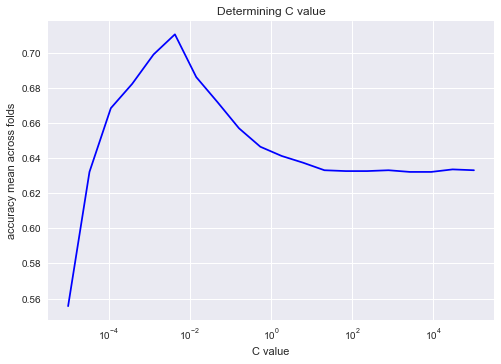

In [56]:
# Your code goes here
score_array = score_array.T
print(score_array)
score_mean = []
for i in range(0,20):
    score_mean.append(np.mean(score_array[i]))
print(score_mean)
plt.semilogx(c_values, score_mean, basex=10, color='blue')
plt.xlabel('C value')
plt.ylabel('accuracy mean across folds')
plt.title('Determining C value')
plt.grid(True)
plt.show()

### ========== Question 1.14 --- [2 marks] ==========
Display the optimal value for the regularisation parameter `C` determined by the search results from Question 1.12. Similarly to Question 1.13, consider the mean classifiation accuracy across CV folds. By using the optimal value (i.e. the one that yields the highest average classification accuracy) train a new `LogisticRegression` classifier and report the classification accuracy on the validation set. *(Hint: Do not pick the optimal value "by hand", instead use an appropriate numpy function).*

In [61]:
# Your code goes here
optimal_c = c_values[score_mean.index(max(score_mean))]
print("Optimal C value", optimal_c)
log_regress_optimal_c = LogisticRegression(solver = "lbfgs", C = optimal_c)
log_regress_optimal_c.fit(X_tr, y_tr)
print("Score of logistic regression with optimal value",log_regress_optimal_c.score(X_val, y_val))


Optimal C value 0.00428133239872
Score of logistic regression with optimal value 0.696316262354


### ========== Question 1.15 --- [1 mark] ========== 
Scikit-learn offers a [`LogisticRegressionCV`](http://scikit-learn.org/0.17/modules/generated/sklearn.linear_model.LogisticRegressionCV.html) module which implements Logistic Regression with builtin cross-validation to find out the optimal `C` parameter. You can specify the range for the `C` parameter, as well as the cross-validation method you want to use with the `Cs` and `cv` parameters, respectively. Use the `C` range you set up in Question 1.12 and the 3-fold cross-validation iterator from Question 1.11. Once again, train the models by using the `lbfgs` optimisation method and display the optimal value for the parameter `C`. Finally, display the classification accuracy on the validation set. Check your results are consistent with those from Question 1.14!

In [66]:
# Your code goes here
log_regress_optimal_c_inbuilt = LogisticRegressionCV(solver = 'lbfgs', Cs = c_values, cv = kf_splits)
log_regress_optimal_c_inbuilt.fit(X_tr, y_tr)
print("Optimal C value cy inbuilt class",log_regress_optimal_c_inbuilt.C_[0])
print("Score of logistic regression (in-built class) with optimal value",log_regress_optimal_c_inbuilt.score(X_val, y_val))

Optimal C value cy inbuilt class 0.00428133239872
Score of logistic regression (in-built class) with optimal value 0.696316262354


### ========== Question 1.16 --- [1 mark] ==========
Now, we want to validate the importance of various features for classification. For this purpose, we will use a [`RandomForestClassifier`](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) (you might want to refer to the labs if you are unsure how we can estimate feature importances with decision tree and random forest models).

Initialise a random forest classifier and fit the model by using training data only and 500 trees (i.e. `n_estimators`). Set the `RandomState` equal to 42 to ensure reproducible results. Report the accuracy score on both the training and validation sets.

In [71]:
# Your code goes here
rand_class = RandomForestClassifier(n_estimators=500, random_state = 42)
rand_class.fit(X_tr, y_tr)
print("Random classifer score on validation set",rand_class.score(X_val, y_val))
print("Random classifer score on trainning set",rand_class.score(X_tr, y_tr))

Random classifer score on validation set 0.692722371968
Random classifer score on trainning set 1.0


### ========== Question 1.17 --- [2 marks] ==========
Comment on the results above. Do you find the discrepancy between training and validation accuracies surprising?

*Your answer goes here*
An accuracy of 1.0 is ofcourse surprising and satisfying but it is possible in case of a random forest. Because, non pruned decision trees are promised to yield 100% overfitting on data where every data has a determenistic predictor branch. To increase the generalization error score, we prune it to make it less suspicious. Here, we used random classifier where we have completely non-pruned randomly split decision trees which again yield 100% accuracy on the training data.

As we could see, score on validation score is near the score of logistic regression model with optimal c (inverse of regularization) value. So, the out of bag score (validation set, here) is quite acceptable.

### ========== Question 1.18 --- [2 marks] ==========
By using the random forest model from the previous question order the features by descending importance and display the names of the 50 most important features.

In [81]:
# Your code goes here
important_indices = (-rand_class.feature_importances_).argsort()[:50]
for i in range(50):
    print(trainA.columns.values[important_indices[i]+1])

dim21
dim51
dim360
dim4
dim479
dim76
dim283
dim461
dim343
dim398
dim348
dim74
dim485
dim356
dim330
dim217
dim263
dim222
dim134
dim500
dim274
dim254
dim206
dim423
dim347
dim17
dim326
dim90
dim92
dim329
dim214
dim322
dim289
dim54
dim440
dim427
dim73
dim35
dim77
dim312
dim315
dim96
dim288
dim483
dim299
dim48
dim442
dim201
dim344
dim294


### ========== Question 1.19 --- [3 marks] ==========
Next, we would like to test the performance of support vector machines. Train three support vector classifiers with the following kernels: linear, radial basis function, and polynomial. Report the classification accuracy of each of the three classifiers on both the training and validation sets.

In [87]:
# Your code goes her
svc_rbf = SVC(kernel = "rbf")
svc_rbf.fit(X_tr, y_tr)
print("AN RBF kerlized SVC Score on validation set: ",svc_rbf.score(X_val,y_val))
print("AN RBF kerlized SVC Score on training set: ",svc_rbf.score(X_tr,y_tr))
print("---------------------------")
svc_poly = SVC(kernel = "poly")
svc_poly.fit(X_tr, y_tr)
print("A polynomial kerlized SVC Score on validation set: ",svc_poly.score(X_val,y_val))
print("AN RBF kerlized SVC Score on training set: ",svc_poly.score(X_tr,y_tr))
print("---------------------------")
svc_linear = SVC(kernel = "linear")
svc_linear.fit(X_tr, y_tr)
print("AN linearly kerlized SVC Score on validation set:  ",svc_linear.score(X_val,y_val))
print("AN RBF kerlized SVC Score on training set: ",svc_linear.score(X_tr,y_tr))


AN RBF kerlized SVC Score on validation set:  0.729559748428
AN RBF kerlized SVC Score on training set:  0.910654562828
---------------------------
A polynomial kerlized SVC Score on validation set:  0.701707097934
AN RBF kerlized SVC Score on training set:  0.990922121357
---------------------------
AN linearly kerlized SVC Score on validation set:   0.638814016173
AN RBF kerlized SVC Score on training set:  0.842331581462


### ========== Question 1.20 --- [3 marks] ==========
At this point, we would like to get an idea of what kind of decision boundaries we can get with the three types of SVM kernels we introduced in the previous question. For visualisation, however, we can only make use of 2D input data. For this purpose, we select to use the 21st and 76th columns of our training features (*hint: remember that Python uses 0-based indexing*). 

Execute the cell below to define a useful function which we will be using to plot the decision boundaries *(it is also not a bad idea to try to understand what this functions does)*. 

Then train three distinct SVM classifiers by using the 2D input data mentioned above and default parameters:
* a linear SVC
* an RBF SVC 
* a polynomial SVC

Finally, create a list containing the three classifiers you have just trained. Use this list as an input to the provided function along with the used training features and observe the outcome. You can use the additional `title` parameter to set the titles in the subplots. Comment on the shape of the boundaries and what this means for classification accuracy in 1-2 sentences.

*(Acknowledgement: this Question has been heavily based on [this example](http://scikit-learn.org/0.17/auto_examples/svm/plot_iris.html) from scikit-learn's documentation.)*

In [20]:
def show_svc_decision_boundaries(clfs, X, title=None):
    """Plots decision boundaries for classifiers with 2D inputs.
    
    Parameters
    ----------
    clf : list
        Classifiers for which decision boundaries will be displayed.
    X : array
        Input features used to train the classifiers.
    title : list, optional
        Titles for classifiers.
    
    """
    
    assert X.shape[1] == 2 # Input should be 2D
    if title is not None:
        assert len(clfs) == len(title)
    
    h = .04 # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    plt.figure(figsize=(15,5))
    for i, clf in enumerate(clfs):
        plt.subplot(1, len(clfs), i + 1)
        plt.subplots_adjust(wspace=0.4, hspace=0.4)
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
        # Training points
        plt.scatter(X[:, 0], X[:, 1], c=y_tr, cmap=plt.cm.Paired)
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.xlim(xx.min(), xx.max())
        plt.ylim(yy.min(), yy.max())
        plt.xticks(())
        plt.yticks(())
        if title is not None:
            plt.title(title[i])

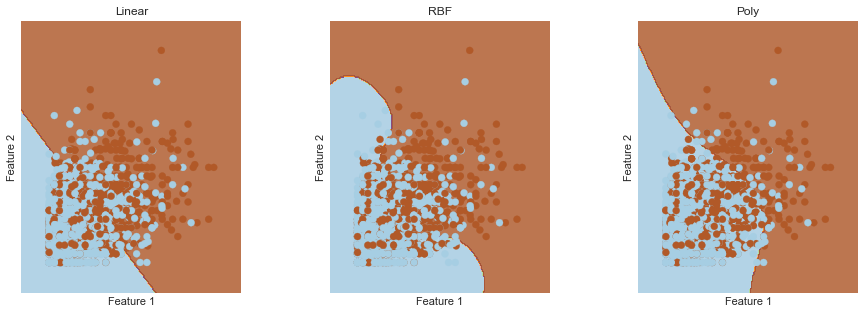

In [86]:
# Your code goes here
X_tr_euclidean = X_tr[:, [20,75]]  # given number - 1, zero indexed nature  
kernels = []
svc_linear_euclidean = SVC(kernel='linear')
svc_linear_euclidean.fit(X_tr_euclidean, y_tr)
kernels.append(svc_linear_euclidean)

svc_rbf_euclidean = SVC(kernel='rbf')
svc_rbf_euclidean.fit(X_tr_euclidean, y_tr)
kernels.append(svc_rbf_euclidean)

svc_poly_euclidean = SVC(kernel='poly')
svc_poly_euclidean.fit(X_tr_euclidean, y_tr)
kernels.append(svc_poly_euclidean)

# Plot results
show_svc_decision_boundaries(kernels, X_tr_euclidean, ['Linear','RBF', 'Poly'])

*Your answer goes here*
1. Obviosuly linear kernel proved to produce a linear decision bounday and rbf, poly produces a non-linear, smoothened curve as illustrated above.
2. RBF seems to have a different curve from polynomial. rbf curve seems to give a decision boundary similar to two rbf peaks (or a Gaussian look-alike) and poly curve gives one bump of a 3-degree polynomial curve (as 3 is the default value for degree parameter in SVC class).

### ========== Question 1.21 --- [5 marks] ==========
So far we have used default parameters for training the SVM classifiers. Now we want to tune the parameters by using cross-validation. 

By using the `K-fold` iterator from Question 1.11 and training data only, estimate the classification accuracy of an SVM classifier with RBF kernel, while you vary the penalty parameter `C` in a logarithmic range `np.logspace(-2, 3, 10)`. Set the kernel coefficient parameter `gamma` to `auto` for this question. 

Plot the mean cross-validated classification accuracy against the regularisation parameter `C` by using a log-scale for the x-axis. Display the highest obtained mean accuracy score and the value of `C` which yielded it. Label axes appropriately. 

Finally, train a classifier by using the optimal value for this parameter (without using cross-validation at this stage) and report the classification accuracy on the training and validation sets. 

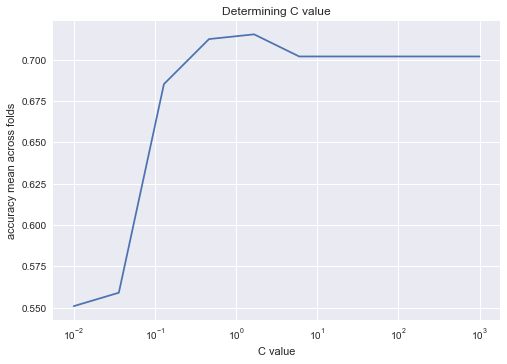

Optimal C value 1.6681005372
Score of logistic regression with optimal value on validation set 0.727762803235
Score of logistic regression with optimal value on training set 0.974677496417


In [91]:
# Your code goes here
c_values_svc = np.logspace(-2, 3, 10)
score_array_svc = np.zeros((3,10))
fold = 0
for train_index, test_index in kf_splits.split(X_tr):
    X_train_temp, X_test_temp = X_tr[train_index, :], X_tr[test_index, :]
    y_train_temp, y_test_temp = y_tr.iloc[train_index], y_tr.iloc[test_index]
    c_in_C = 0
    for c in c_values_svc:
        svc_rbf_in_loop = SVC(C = c, kernel='rbf', gamma = 'auto')
        svc_rbf_in_loop.fit(X_train_temp,y_train_temp)
        score_array_svc[fold][c_in_C] = svc_rbf_in_loop.score(X_test_temp,y_test_temp)
        c_in_C += 1
    fold += 1
# print(score_array_svc)
score_array_svc = score_array_svc.T
score_mean_svc = []
for i in range(0,10):
    score_mean_svc.append(np.mean(score_array_svc[i]))
# print(score_mean_svc)
plt.semilogx(c_values_svc, score_mean_svc)
plt.xlabel('C value')
plt.ylabel('accuracy mean across folds')
plt.title('Determining C value')
plt.grid(True)
plt.show()
optimal_c_svc = c_values_svc[score_mean_svc.index(max(score_mean_svc))]
print("Optimal C value", optimal_c_svc)
svc_rbf_optimal_c = SVC(C = optimal_c_svc , kernel='rbf', gamma = 'auto')
svc_rbf_optimal_c.fit(X_tr, y_tr)
print("Score of logistic regression with optimal value on validation set",svc_rbf_optimal_c.score(X_val, y_val))
print("Score of logistic regression with optimal value on training set",svc_rbf_optimal_c.score(X_tr, y_tr))


### ========== Question 1.22 --- [5 marks] ==========
Now we turn to the kernel coefficient `gamma` parameter. By using the same procedure as in the previous question, estimate the classification accuracy of an SVM classifier with RBF kernel while you vary the `gamma` parameter in a logarithmic range `logspace(-5, 0, 10)`. Fix the penalty parameter `C=1.0`.

Plot the mean cross-validated classification accuracy against the parameter `gamma` by using a log-scale for the x-axis. Display the highest obtained mean accuracy score and the value of `gamma` which yielded it.  Label axes appropriately.

Finally, train a classifier by using the optimal value for this parameter (without using cross-validation at this stage) and report the classification accuracy on the training and validation sets. 

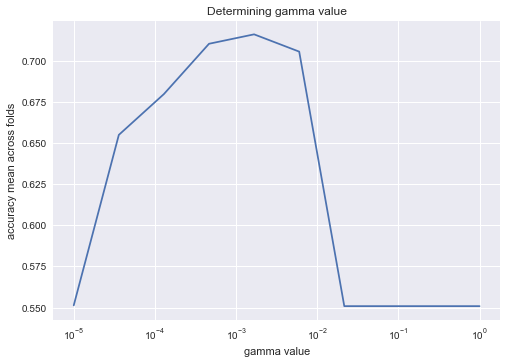

Optimal gamma value 0.0016681005372
Score of logistic regression with optimal gamma value on validation set 0.726864330638
Score of logistic regression with optimal gamma value on training set 0.891065456283


In [119]:
# Your code goes here
# Your code goes here
gamma_values_svc = np.logspace(-5, 0, 10)
score_array_svc_gamma = np.zeros((3,10))
fold = 0
for train_index, test_index in kf_splits.split(X_tr):
    X_train_temp, X_test_temp = X_tr[train_index, :], X_tr[test_index, :]
    y_train_temp, y_test_temp = y_tr.iloc[train_index], y_tr.iloc[test_index]
    g_in_gamma = 0
    for g in gamma_values_svc:
        svc_rbf_in_loop = SVC(C = 1.0, kernel='rbf', gamma = g)
        svc_rbf_in_loop.fit(X_train_temp,y_train_temp)
        score_array_svc_gamma[fold][g_in_gamma] = svc_rbf_in_loop.score(X_test_temp,y_test_temp)
        g_in_gamma += 1
    fold += 1
# print(score_array_svc)
score_array_svc_gamma = score_array_svc_gamma.T
score_mean_svc_gamma = []
for i in range(0,10):
    score_mean_svc_gamma.append(np.mean(score_array_svc_gamma[i]))
# print(score_mean_svc)
plt.semilogx(gamma_values_svc, score_mean_svc_gamma)
plt.xlabel('gamma value')
plt.ylabel('accuracy mean across folds')
plt.title('Determining gamma value')
plt.grid(True)
plt.show()
optimal_gamma_svc = gamma_values_svc[score_mean_svc_gamma.index(max(score_mean_svc_gamma))]
print("Optimal gamma value", optimal_gamma_svc)
svc_rbf_optimal_gamma = SVC(C = 1.0 , kernel='rbf', gamma = optimal_gamma_svc)
svc_rbf_optimal_gamma.fit(X_tr, y_tr)
print("Score of logistic regression with optimal gamma value on validation set",svc_rbf_optimal_gamma.score(X_val, y_val))
print("Score of logistic regression with optimal gamma value on training set",svc_rbf_optimal_gamma.score(X_tr, y_tr))


### ========== Question 1.23 --- [7 marks] ==========
Now we wish to tune both the `C` and `gamma` parameters simultaneously. To save computational time, we will now constrain the parameter search space. Define a `4 X 4` grid for the two parameters, as follows:
* `C`: `np.logspace(-2, 1, 4)`
* `gamma`: `np.logspace(-4, -1, 4)`

Estimate the mean cross-validated classification accuracy by using training data only and all possible configurations for the two parameters. 

Use a [heatmap](https://seaborn.github.io/generated/seaborn.heatmap.html?highlight=heatmap#seaborn.heatmap) to visualise the mean cross-validated classification accuracy for all `C`-`gamma` pairs. Label axes appropriately and display the values for `C` and `gamma` for the best performing configuration. 

Finally, by using the optimal configuration, train a classifier (without using cross-validation) and report the classification accuracy on the training and validation sets.

In [108]:
# Your code goes here
gammas = np.logspace(-4, -1, 4)
cs = np.logspace(-2, 1, 4)
score_array_svc_final = np.zeros((3,4,4))
fold = 0
for train_index, test_index in kf_splits.split(X_tr):
    X_train_temp, X_test_temp = X_tr[train_index, :], X_tr[test_index, :]
    y_train_temp, y_test_temp = y_tr.iloc[train_index], y_tr.iloc[test_index]
    c_in_cs = 0
    for c in cs:
        g_in_gammas = 0
        for g in gammas:
            svc_rbf_in_loop = SVC(C = c, kernel='rbf', gamma = g)
            svc_rbf_in_loop.fit(X_train_temp,y_train_temp)
            score_array_svc_final[fold][c_in_cs][g_in_gammas] = svc_rbf_in_loop.score(X_test_temp,y_test_temp)
            g_in_gammas += 1
        c_in_cs += 1
    fold += 1
print(score_array_svc_final)

[[[ 0.56017192  0.56017192  0.56017192  0.56017192]
  [ 0.56017192  0.67621777  0.56017192  0.56017192]
  [ 0.67335244  0.70773639  0.65759312  0.56017192]
  [ 0.6991404   0.69197708  0.67048711  0.56017192]]

 [[ 0.54584527  0.54584527  0.54584527  0.54584527]
  [ 0.54584527  0.69627507  0.54584527  0.54584527]
  [ 0.70773639  0.74212034  0.64899713  0.54584527]
  [ 0.73782235  0.6991404   0.67908309  0.54584527]]

 [[ 0.54662841  0.54662841  0.54662841  0.54662841]
  [ 0.54662841  0.67718795  0.54662841  0.54662841]
  [ 0.66284075  0.68723099  0.6312769   0.54662841]
  [ 0.69296987  0.68149211  0.64131994  0.54662841]]]


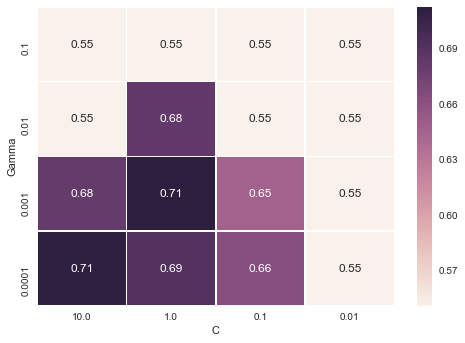

In [110]:
score = score_array_svc_final.T
averaged_score = np.zeros([4,4])
for i in range(4):
    for j in range(4):
        averaged_score[i,j] = np.mean(score_array_svc_final[:,i,j])

ax = sns.heatmap(averaged_score, xticklabels=cs[::-1], yticklabels=gammas[::-1],annot=True, linewidths=.5)
ax.set_xlabel('C')
ax.set_ylabel('Gamma')

In [121]:
c_g = unravel_index(averaged_score.argmax(), averaged_score.shape)
print("Optimal C value", cs[c_g[0]])
print("Optimal gamma value", gammas[c_g[1]])
svc_opt = SVC(C = cs[c_g[0]], kernel='rbf', gamma = gammas[c_g[1]])
svc_opt.fit(X_tr,y_tr)
print("Score on validation set", svc_opt.score(X_val, y_val))
print("Score on training set", svc_opt.score(X_tr, y_tr))

Optimal C value 1.0
Optimal gamma value 0.001
Score on validation set 0.721473495058
Score on training set 0.834687052078


### ========== Question 1.24 --- [3 marks] ==========
Is the classification accuracy on the validation set higher than in previous questions (1.22-1.23)? If not, can you explain why? Can you think of a way of further improving the performance of the classifier? You don't need to implement your suggestion at this stage. Would there be any associated problems with your suggested approach? 

### Answer:
There is no improvement in this model comparing the previous models with the optimal penalty and gamma (rbf width) values. But there is reduction in training set score. Which means the model is bit generalized and not overfitting as the previous models (of 1.21 - 1.23)

The score hasnt increased from the prevoius models as we landed with C =1.0 and gamma = 0.001. Our default values, were c = 1.0 and gamma = 'auto' (which is 1/number_of_features = 1/501 = 0.0019). Roughly similair to what we used before. SO no wonder we got the same score here.
#### 0. Solution:
We could only use attributes of much importance and train the data to get better results.
#### 1.Solution:
We have been working on cross-validation on training set to tune hyper-parameters. Hyper parameter tuning should be totally based on an unseen data like the validation data we have.
#### 2.Solution (a theory):
Both the curves as plotted in 1.21 and 1.22 seem to be continous, convex curves and global maxima can be found over these curves by applying convex optimization if needed. This can be accelerated by increasing and decreasing the momentum. Like a gradient ascent (origianally gradient descent)
#### 3.Solution:
To overcome this we could expand the number of possibilities of C and gamma 
#### 3.1.Problem of the previous solution:
Time complexity
#### 4.Solution:
Looking around gamma = 0.0016681005372 and C = 1.6681005372 (from 1.21 and 1.22). This might reduce the region of interest around these values.
#### 4.1Problem of the previous solution:
They are still around the default values.


### ========== Question 1.25 --- [5 marks] ==========
Now we want to evaluate the performance of an SVM classifier with polynomial kernel. Once again, we will tune the `degree` parameter by using cross-validation (similarly to what we did in Questions 1.21 and 1.22).

By using the `K-fold` iterator from Question 1.11 and training data only, estimate the classification accuracy of polynomial SVM classifier, while you vary the `degree` parameter in the range `np.arange(1,8)`. 

Plot the mean cross-validated classification accuracy against the polynomial degree. Display the highest obtained mean accuracy score and the value of the `degree` parameter which yielded it. Label axes appropriately. 

Finally, train a classifier by using the optimal value for this parameter (without using cross-validation at this stage) and report the classification accuracy on the training and validation sets. 

In [124]:
# Your code goes 
degrees = np.arange(1,8)
score_array_svc_poly = np.zeros((3,7))
fold = 0
for train_index, test_index in kf_splits.split(X_tr):
    X_train_temp, X_test_temp = X_tr[train_index, :], X_tr[test_index, :]
    y_train_temp, y_test_temp = y_tr.iloc[train_index], y_tr.iloc[test_index]
    d_in_degrees = 0
    for degree in degrees:
        svc_poly_in_loop = SVC(kernel='poly', degree = degree)
        svc_poly_in_loop.fit(X_train_temp,y_train_temp)
        score_array_svc_poly[fold][d_in_degrees] = svc_poly_in_loop.score(X_test_temp,y_test_temp)
        d_in_degrees += 1
    fold += 1
print(score_array_svc_poly)

[[ 0.67908309  0.6747851   0.65472779  0.61318052  0.63180516  0.58309456
   0.55730659]
 [ 0.74498567  0.67908309  0.71060172  0.60888252  0.58309456  0.56017192
   0.55444126]
 [ 0.68436155  0.64131994  0.68723099  0.66140603  0.60114778  0.57962697
   0.57245337]]


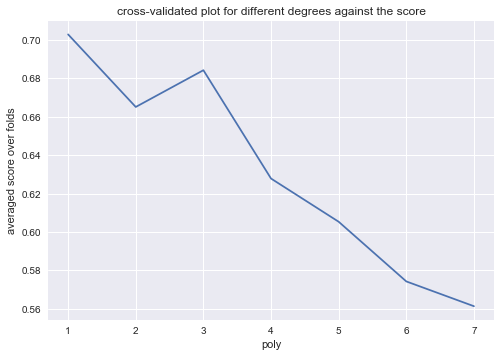

In [127]:
score_array_svc_poly = score_array_svc_poly.T
averaged_score_poly_svc = []
for i in range(7):
    averaged_score_poly_svc.append(np.mean(score_array_svc_poly[i]))
plt.figure()
plt.plot(degrees, averaged_score_poly_svc)
plt.xlabel('poly')
plt.ylabel('averaged score over folds')
plt.title('cross-validated plot for different degrees against the score')
plt.grid(True)
plt.show()

In [128]:
optimal_degree = degrees[averaged_score_poly_svc.index(max(averaged_score_poly_svc))]
svc_poly_best = SVC(kernel='poly', degree = optimal_degree)
svc_poly_best.fit(X_tr,y_tr)
print("Score of the poly kernelised SVM with an optimal degree value on validation set", svc_poly_best.score(X_val,y_val))
print("Score of the poly kernelised SVM with an optimal degree value on training set", svc_poly_best.score(X_tr,y_tr))

Score of the poly kernelised SVM with an optimal degree value on validation set 0.689128481581
Score of the poly kernelised SVM with an optimal degree value on training set 0.783564261825


### ========== Question 1.26 --- [4 marks] ==========

You might have noticted that so far, we have used cross-validation for optimising the various tuning parameters (e.g. regularisation parameter in logistic regression, SVM kernel parameters) rather than hold-out validation, although we did have access to a validation set. Why do you think this is a good/bad idea? Give one advantage and one disadvantage of the two different approaches. Which one would you trust more in practice?

*Your answer goes here*
I think the usage of cross-validation set is a bad idea. Eventually we take an average of the 3 folds which mean all the training data again try to contribute to hyper-tuning. 
Hyper parameter tuning should be based on unseen data which increases the generalization score. Hold-out validation could be a good idea in generalizing the model so that we can use it on test data.

Disadvantage of using K-Fold:
Computational cost, reliability over training data.
Advantage of using K-Fold:
Varies over the whole training data

Disadvantage of using holdout:
If the validation set data is small, the variance might expand a lot.
Advantage of using holdout:
If the validation set is large, the model is reliable to hypertune over this holdout.

Answer: Since, the validation set is large (1113 = 50% of size of training data), I would prefer hold-out data.

### ========== Question 1.27 --- [6 marks] ==========

Reload the full training and validation data that contain all indicator variables for all object categories. Remove the `imgId` attribute but keep all of the class indicator variables in the dataset this time. Your training features should include all attributes except `is_person` which should be your target variable. 

Once again, use a [StandardScaler](http://scikit-learn.org/0.17/modules/generated/sklearn.preprocessing.StandardScaler.html) to standardise your training and validation features. Then train a Random Forest Classifier by using the entropy `criterion`, 500 `n_estimators`, and also set the `random_state` to 31. Report the classification accuracy on the training and validation sets.

Similarly to what we did in Question 1.18, order the features by decreasing importance and display the 50 most important features. 

Finally, answer the following questions:
* What do you notice by looking at the list of the best 50 features?
* How does the performance differ with respect to the case when the additional class indicator variables are not present (Question 1.16)? Relate your observations to the observed feature ranking.
* Would it be easy to make use of the results in practice? Briey explain your reasoning.

*(Hint: you might want to look at some of the [images](http://www.inf.ed.ac.uk/teaching/courses/iaml/2014/assts/asst3/images.html) to justify your explanations.)*

In [149]:
# Your code goes here
trainA_final = pd.read_csv('datasets/train_images_partA.csv')
validA_final = pd.read_csv('datasets/valid_images_partA.csv')
X_trainA_final = trainA_final.drop(['is_person','imgId'],1)
y_trainA_final = trainA_final['is_person']
X_validA_final = validA_final.drop(['is_person','imgId'],1)
y_validA_final = validA_final['is_person']

scaler_final = StandardScaler().fit(X_trainA_final)
X_trainA_final = scaler_final.transform(X_trainA_final)
X_validA_final = scaler_final.transform(X_validA_final)

clf = RandomForestClassifier(criterion = "entropy", random_state=31, n_estimators=500)
clf.fit(X_trainA_final, y_trainA_final)
print("RF classifier score on transformed data on validation set",clf.score(X_validA_final, y_validA_final))
print("RF classifier score on transformed data on training set",clf.score(X_trainA_final, y_trainA_final))

RF classifier score on transformed data on validation set 0.711590296496
RF classifier score on transformed data on training set 1.0


In [150]:
important_indices_final = (-clf.feature_importances_).argsort()[:50]
for i in range(50):
    print(trainA_final.columns.values[important_indices_final[i]+1], clf.feature_importances_[important_indices_final[i]+1])

is_cat 0.000165702969424
is_bird 8.20898363294e-05
dim21 0.00144966609068
dim51 0.0020772673239
dim360 0.00183600000718
dim4 0.00185653819445
dim76 0.00294289848794
dim398 0.00163429644303
dim283 0.00197748822618
dim479 0.00170191128287
dim263 0.00217515595293
dim343 0.00253208466595
dim423 0.0016770738024
dim485 0.00157095700828
dim254 0.0015625297967
dim461 0.00217519416411
dim222 0.00100143622369
dim356 0.00246007393708
dim74 0.00177229688818
dim288 0.00262471691488
dim214 0.00158720654842
dim348 0.00217885006694
dim330 0.00136613662379
dim217 0.00149528354631
dim483 0.00151543219294
dim90 0.0
dim274 0.00164336437971
dim347 0.00378109590495
dim17 0.0014864286637
dim427 0.00184369218672
dim35 0.00138358210709
dim326 0.00158882693985
dim73 0.00386033674817
dim312 0.00173419180419
dim48 0.00201798400117
dim25 0.00184394181411
dim315 0.00193599864975
dim322 0.00207208822636
dim329 0.00371254853142
dim500 0.00299790355923
dim134 0.00218313711489
dim206 0.0026215120763
is_aeroplane 0.0011

*Your answer goes here*
The term important means they are correlated


1. On enquiring the table columns of 'is_cat' and 'is_bird' and 'is_person', a negative correllation was found. Which means its unlikely to have both cats and person or birds and person in a single picture. 

2. Only three class indicator features are included into the important feature list comparing with 1.18. Rest of the class indicators are not correlated much. Anyways, including this we have increased 2% in the score on validation set.

3. Removing other features and class indicators and training might increase the speed atleast and they do not seem to have a greater impact (just 2% accuracy). Increasing number of features in a random forest will exponentially increase the number of randomly split trees in the ensemble. So, its not worth it to execute in practice.

## Mini challenge [30%]

*Important: You are allowed to write up to a maximum of 600 words in this part of the assignment. The thoroughness of the exploration and the quality of the resulting discussion is just as important as the final classification performance of your chosen method(s) and credit will be divided accordingly.*

In this final part of the assignment we will have a mini object-recognition challenge. Using the data provided you are asked to find the best classiffier for the person/no person classification task. You can apply any preprocessing steps to the data that you think fit and employ any classifier you like (with the provison that you can explain what the classifier is/preprocessing steps are doing). You can also employ any lessons learnt during the course, either from previous Assignments, the Labs or the lecture material to try and squeeze out as much performance as you possibly can. The only restriction is that all steps must be performed in `Python` by using the `numpy`, `pandas` and `sklearn` packages. You can also make use of `matplotlib` and `seaborn` for visualisation. 

**Important:** The classification performance metric that we will use for this part is the *cross-entropy* or *logarithmic loss* (see the labs). You should familiarise yourself with the metric by reading the `sklearn` [user guide](http://scikit-learn.org/stable/modules/model_evaluation.html#log-loss) and [documentation](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.log_loss.html#sklearn.metrics.log_loss). To estimate this metric you will need to evaluate probability outputs, as opposed to discrete predictions which we have used so far to compute classification accuracies. Most models in `sklearn` implement a `predict_proba()` method which returns the probabilities for each class. For instance, if your test set consists of `N` datapoints and there are `K` classes, the method will return a `N` x `K` matrix.

We provide you with three new data sets: a training set (`train_images_partB.csv`), a validation set (`valid_images_partB.csv`), and a test set (`test_images_partB.csv`). You must use the former two for training and evaluating your models (as you see fit). Once you have chosen your favourite model (and pre-processing steps) you should apply it to the test set (for which no labels are provided). Estimate the posterior proabilities for the data points in the test set and submit your results as part of your answer. Your results will be evaluated in terms of the logarithmic loss metric. You also need to submit a brief description of the approaches you considered, your suggested final approach, and a short explanation of why you chose it. The thoroughness of the exploration and the quality of the resulting discussion is just as important as the final score of your chosen method(s) and credit will be divided accordingly.

*Hint: Feature engineering, feature combination, model combination and model parameter optimization can significantly improve performance.*

**How to submit your results**: Store the estimated probabilities for the data points in the test set in a 2D numpy array. Then execute the provided cell at the end of this notebook which uses a provided `save_predictions` function to export your results into a `.txt` file (the function will return an error if the provided array has not the right shape). The `.txt` file will be saved where your notebook lives. Submit this file along with your notebook as detailed at the top of this file.

*Your answer goes here (max. 600 words)*



In [152]:
# Your code goes here
trainChallenge = pd.read_csv('datasets/train_images_partB.csv')
validChallenge = pd.read_csv('datasets/valid_images_partB.csv')
testChallenge = pd.read_csv('datasets/test_images_partB.csv')

In [154]:
trainChallenge_X = trainChallenge.drop('is_person', 1)
trainChallenge_y = trainChallenge['is_person']
validChallenge_X = validChallenge.drop('is_person', 1)
validChallenge_y = validChallenge['is_person']
testChallenge_X = testChallenge.drop('is_person', 1)
testChallenge_y = testChallenge['is_person']

In [157]:
print(trainChallenge_X.head(5))
print(trainChallenge_X.describe)
print(trainChallenge_X.shape)
attributes_challenge = trainChallenge_X.columns.values

         imgId      dim1      dim2      dim3      dim4      dim5      dim6  \
0  2008_000008  0.002232  0.000558  0.002790  0.000837  0.001674  0.001953   
1  2008_000015  0.001563  0.000391  0.007422  0.003516  0.003906  0.005078   
2  2008_000019  0.000521  0.000000  0.000000  0.001042  0.001563  0.005729   
3  2008_000023  0.002976  0.002232  0.004464  0.000372  0.000372  0.002232   
4  2008_000028  0.001359  0.000340  0.001359  0.000340  0.001359  0.002038   

       dim7      dim8      dim9      ...       is_chair  is_cow  \
0  0.001395  0.002232  0.003627      ...              0       0   
1  0.001953  0.002344  0.001953      ...              0       0   
2  0.000521  0.002083  0.003646      ...              0       0   
3  0.000000  0.003720  0.000000      ...              0       0   
4  0.002378  0.000000  0.003397      ...              0       0   

   is_diningtable  is_dog  is_horse  is_motorbike  is_pottedplant  is_sheep  \
0               0       0         1             0

In [ ]:
logistic_challenge = LogisticRegression(solver  =)

In [28]:
# Execute this cell to export your results
from numpy import savetxt
def save_predictions(pred_proba):
    if pred_proba.shape != (1114,2):
        raise ValueError('Predicted probabilities array is not the right shape.')
    
    savetxt('assignment_3_predictions.txt', pred_proba)

# You need to replace "test_images_partB_pred_proba"
# with the name of the array which contains the probability 
# estimates for the data in the test set.
save_predictions(test_images_partB_pred_proba) 

NameError: name 'test_images_partB_pred_proba' is not defined

# Appendix

## More information about visual words

Visual words are based on [Scale-invariant feature transforms (SIFT)](https://en.wikipedia.org/wiki/Scale-invariant_feature_transform). SIFT features are essentially local orientation histograms and capture the properties of small image regions. They possess attractive invariance properties which make them well suited for our task (you can read more about SIFT features in [D.Lowe, IJCV 60(2):91- 110, 2004](http://link.springer.com/article/10.1023/B:VISI.0000029664.99615.94), but the details don't matter for the purpose of this assignment). Each SIFT feature is a 128 dimensional vector. From each image many SIFT features are extracted, typically > 2500 per image (features are extracted at regular intervals using a 15 pixel grid and at 4 different scales). To obtain visual words a representative subset of all extracted SIFT features from all images is chosen and clustered with k-means using 500 centres (such use of the k-means algorithm will be discussed in detail during the lecture). These 500 cluster centres form our visual words. The representation of a single image is obtained by first assigning each SIFT feature extracted from the image to the appropriate cluster (i.e. we determine the visual word corresponding to each feature by picking the closest cluster centre). We then count the number of features from that image assigned to each cluster (i.e. we determine how often each visual word is present in the image). This results in a 500 dimensional count vector for each image (one dimension for each visual word). The normalized version of this count vector gives the final representation of the image (normalized means that we divide the count vector by the total number of visual words in the image, i.e. the normalized counts sum to 1 for each image)